In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,84538,84539,84540,84541,84542,84543,84544,84545,84546,84547
Unnamed: 0,4,5,6,7,8,9,10,11,12,13,...,8404,8405,8406,8407,8408,8409,8410,8411,8412,8413
BOROUGH,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,...,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW,WOODROW
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,08 RENTALS - ELEVATOR APARTMENTS,08 RENTALS - ELEVATOR APARTMENTS,...,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,22 STORE BUILDINGS,35 INDOOR PUBLIC AND CULTURAL FACILITIES
TAX CLASS AT PRESENT,2A,2,2,2B,2A,2,2B,2,2,2,...,1,1,1,1,1,1,1,1,4,4
BLOCK,392,399,399,402,404,405,406,407,379,387,...,7316,7316,7316,7317,7339,7349,7349,7351,7100,7105
LOT,6,26,39,21,55,16,32,18,34,153,...,61,85,93,126,41,34,78,60,28,679
EASE-MENT,,,,,,,,,,,...,,,,,,,,,,
BUILDING CLASS AT PRESENT,C2,C7,C7,C4,C2,C4,C4,C7,D5,D9,...,B2,B2,B2,B2,B9,B9,B9,B2,K6,P9
ADDRESS,153 AVENUE B,234 EAST 4TH STREET,197 EAST 3RD STREET,154 EAST 7TH STREET,301 EAST 10TH STREET,516 EAST 12TH STREET,210 AVENUE B,520 EAST 14TH STREET,141 AVENUE D,629 EAST 5TH STREET,...,178 DARNELL LANE,137 DARNELL LANE,125 DARNELL LANE,112 ROBIN COURT,41 SONIA COURT,37 QUAIL LANE,32 PHEASANT LANE,49 PITNEY AVENUE,2730 ARTHUR KILL ROAD,155 CLAY PIT ROAD


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
aux=df.copy()

In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
df.drop(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'TOTAL UNITS','YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
        'SALE DATE'],axis=1,inplace=True)

In [7]:
df.replace(' -  ',0,inplace=True)

In [8]:
df=df.astype('int64')
df.dtypes

RESIDENTIAL UNITS    int64
COMMERCIAL UNITS     int64
LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
dtype: object

In [9]:
df=df[df["SALE PRICE"]>0]
df=df[df["GROSS SQUARE FEET"]>0]
df=df[df["LAND SQUARE FEET"]>0]
df.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,5,0,1633,6440,6625000
3,10,0,2272,6794,3936272
4,6,0,2369,4615,8000000
6,8,0,1750,4226,3192840
9,24,0,4489,18523,16232000


In [10]:
df.shape

(29329, 5)

In [11]:
df=df.merge(aux["NEIGHBORHOOD"],left_index=True,right_index=True,how="inner")
df.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD
0,5,0,1633,6440,6625000,ALPHABET CITY
3,10,0,2272,6794,3936272,ALPHABET CITY
4,6,0,2369,4615,8000000,ALPHABET CITY
6,8,0,1750,4226,3192840,ALPHABET CITY
9,24,0,4489,18523,16232000,ALPHABET CITY


In [12]:
df=df.groupby("NEIGHBORHOOD").mean().reset_index()
df.drop(["NEIGHBORHOOD"],axis=1,inplace=True)
X=df.copy()
df.shape

(250, 5)

In [13]:
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [15]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.59712394, 0.80227951])

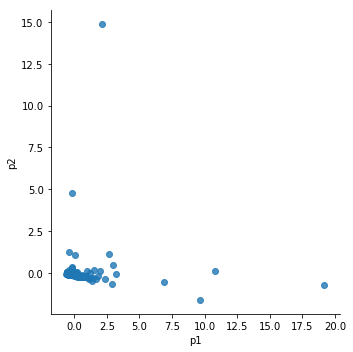

In [17]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [18]:
mds=MDS(n_components=2)

In [19]:
Xm=pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

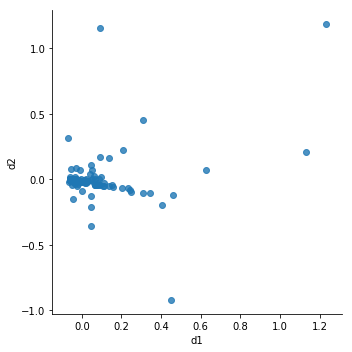

In [20]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [21]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

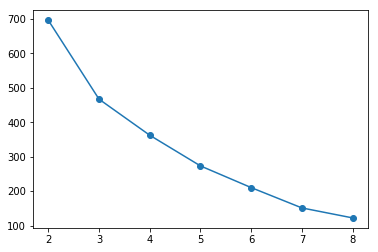

In [22]:
plt.plot(range(2,9),lst_in,marker='o')